In [2]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA


In [3]:
data = pd.read_csv("heart_data.csv")
data.isnull().sum()
x = data.iloc[:,:-1]
st_scaler = StandardScaler()
x_scaled = st_scaler.fit_transform(x)
y = data.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y ,test_size=0.3,random_state=42)
LR = LogisticRegression(max_iter=1000)
LR.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [4]:
data.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [5]:
predic_LR = LR.predict(x_test)

print("===== LOGISTIC REGRESSION TESTING =====")
print(f"Acc score:{accuracy_score(y_test,predic_LR)}")
print(f"F1 score:{f1_score(y_test,predic_LR)}")
print(f"Recall score:{recall_score(y_test,predic_LR)}")
print(f"Precision score:{precision_score(y_test,predic_LR)}")
print(f"{confusion_matrix(y_test,predic_LR)}")
print(f"{classification_report(y_test,predic_LR)}")

===== LOGISTIC REGRESSION TESTING =====
Acc score:0.97
F1 score:0.9721362229102167
Recall score:0.9691358024691358
Precision score:0.9751552795031055
[[134   4]
 [  5 157]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       138
           1       0.98      0.97      0.97       162

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [6]:
Decision_tree = DecisionTreeClassifier(criterion='gini',min_samples_leaf=2,min_samples_split=2,random_state=42)
Decision_tree.fit(x_train,y_train)
pred_DT = Decision_tree.predict(x_test)

print("===== DECISION TREE TESTING =====")
print(f"Acc score:{accuracy_score(y_test,pred_DT)}")
print(f"F1 score:{f1_score(y_test,pred_DT)}")
print(f"Recall score:{recall_score(y_test,pred_DT)}")
print(f"Precision score:{precision_score(y_test,pred_DT)}")
print(f"{confusion_matrix(y_test,pred_DT)}")
print(f"{classification_report(y_test,pred_DT)}")

===== DECISION TREE TESTING =====
Acc score:0.97
F1 score:0.9721362229102167
Recall score:0.9691358024691358
Precision score:0.9751552795031055
[[134   4]
 [  5 157]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       138
           1       0.98      0.97      0.97       162

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [7]:
Rand_Forest = RandomForestClassifier(n_estimators=200,random_state=42,max_depth=None,)
Rand_Forest.fit(x_train,y_train)
predic_RF = Rand_Forest.predict(x_test)

print("===== RANDOM FOREST TESTING =====")
print(f"Acc score:{accuracy_score(y_test,predic_RF)}")
print(f"F1 score:{f1_score(y_test,predic_RF)}")
print(f"Recall score:{recall_score(y_test,predic_RF)}")
print(f"Precision score:{precision_score(y_test,predic_RF)}")
print(f"{confusion_matrix(y_test,predic_RF)}")
print(f"{classification_report(y_test,predic_RF)}")


===== RANDOM FOREST TESTING =====
Acc score:0.9866666666666667
F1 score:0.9876543209876543
Recall score:0.9876543209876543
Precision score:0.9876543209876543
[[136   2]
 [  2 160]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       138
           1       0.99      0.99      0.99       162

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [8]:
param_grid = {
    'C': [0.01,0.02, 0.1, 1, 10,100],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

Grid_scv = GridSearchCV(param_grid=param_grid,estimator=LR,cv=5,scoring='accuracy',n_jobs=1,verbose=1)
Grid_scv.fit(x_train,y_train)
predict_gscv = Grid_scv.predict(x_test)

print("===== GRID SEARCH CV TESTING =====")
print(f"Acc score:{accuracy_score(y_test,predict_gscv)}")
print(f"F1 score:{f1_score(y_test,predict_gscv)}")
print(f"Recall score:{recall_score(y_test,predict_gscv)}")
print(f"Precision score:{precision_score(y_test,predict_gscv)}")
print(f"{confusion_matrix(y_test,predict_gscv)}")
print(f"{classification_report(y_test,predict_gscv)}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
===== GRID SEARCH CV TESTING =====
Acc score:0.97
F1 score:0.9721362229102167
Recall score:0.9691358024691358
Precision score:0.9751552795031055
[[134   4]
 [  5 157]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       138
           1       0.98      0.97      0.97       162

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



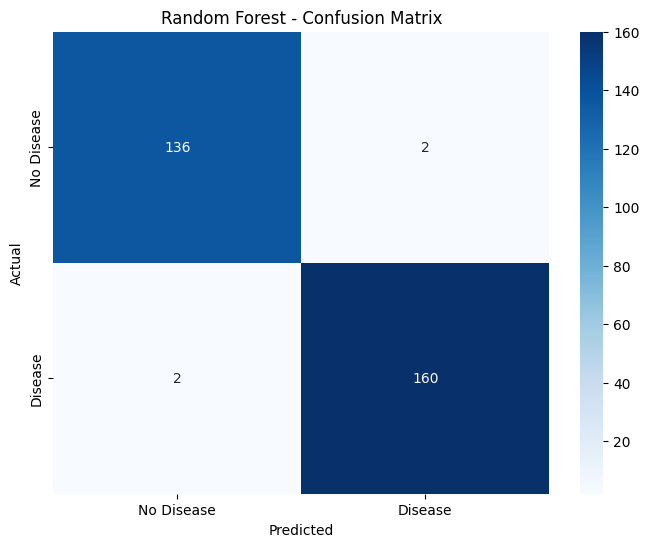

In [9]:
cm = confusion_matrix(y_test, predic_RF)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()


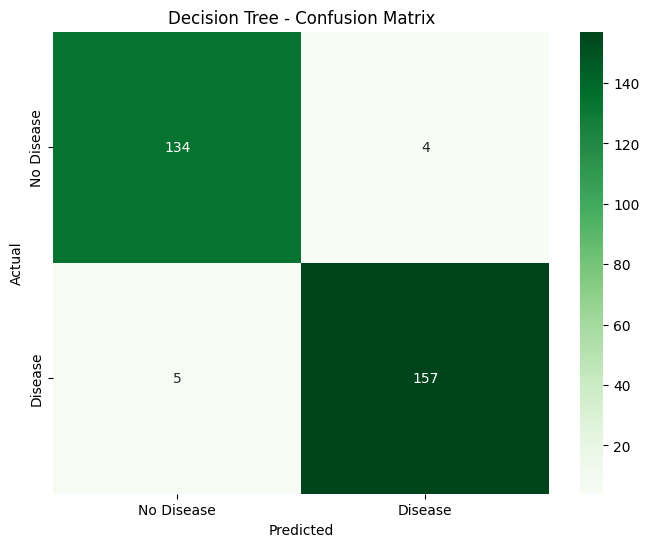

In [16]:
cm = confusion_matrix(y_test, pred_DT)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree - Confusion Matrix')
plt.show()


In [11]:
comparison_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Accuracy': [
        accuracy_score(y_test, predic_LR),
        accuracy_score(y_test, predic_RF),
        accuracy_score(y_test, pred_DT)
    ],
    'Precision': [
        precision_score(y_test, predic_LR),
        precision_score(y_test, predic_RF),
        precision_score(y_test, pred_DT)
    ],
    'Recall': [
        recall_score(y_test, predic_LR),
        recall_score(y_test, predic_RF),
        recall_score(y_test, pred_DT)
    ],
    'F1-Score': [
        f1_score(y_test, predic_LR),
        f1_score(y_test, predic_RF),
        f1_score(y_test, pred_DT)
    ]
}

comparison_df = pd.DataFrame(comparison_data)

print("\n===== MODEL COMPARISON TABLE =====")
print(comparison_df.to_string(index=False))

print("\n===== BEST MODEL PER METRIC =====")
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    best_idx = comparison_df[metric].idxmax()
    best_model = comparison_df.loc[best_idx, 'Model']
    best_score = comparison_df.loc[best_idx, metric]
    print(f"{metric}: {best_model} ({best_score:.4f})")


===== MODEL COMPARISON TABLE =====
              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.970000   0.975155 0.969136  0.972136
      Random Forest  0.986667   0.987654 0.987654  0.987654
      Decision Tree  0.970000   0.975155 0.969136  0.972136

===== BEST MODEL PER METRIC =====
Accuracy: Random Forest (0.9867)
Precision: Random Forest (0.9877)
Recall: Random Forest (0.9877)
F1-Score: Random Forest (0.9877)


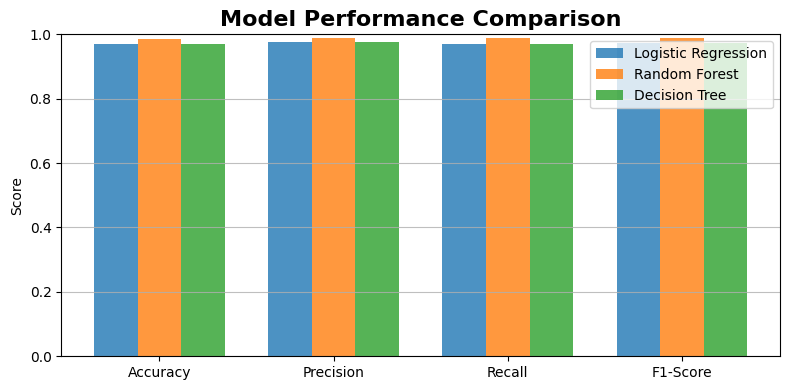

In [12]:

# Visualization
fig, ax = plt.subplots(figsize=(8, 4))

x = range(len(comparison_df.columns[1:]))
width = 0.25

for i, model in enumerate(comparison_df['Model']):
    values = comparison_df.iloc[i, 1:].values
    positions = [pos + width * i for pos in x]
    ax.bar(positions, values, width, label=model, alpha=0.8)

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison', fontsize=16, fontweight='bold')
ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(comparison_df.columns[1:])
ax.set_ylim([0, 1])
ax.legend()
ax.grid(axis='y', alpha=0.8)

plt.tight_layout()
plt.show()

In [13]:
# DEMONSTRATION
#
# with checking all three models Logistic regression, decision tree, and random forest among those Random forest performs well above all